Connected to ift6758-conda-env (Python 3.11.5)

## 6. Advanced Visualizations: Shot Maps

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('tidied_nhl.csv')

In [3]:
## if there's time, print the gameID with no RinkSide information
# df_noRinkSide = df[(df['RinkSide'].isna()) & (df['Period'] != 5)]
# df_noRinkSide = df_noRinkSide[['GameID', 'RinkSide']].drop_duplicates().groupby(['GameID']), index=df_shots['GameID'].unique(), columns=['GameID']
# df_noRinkSide

In [4]:
## select for non null values
df = df[(df['RinkSide'].notna())]
df = df[(df['XCoord'].notna())]
df_bp1 = df[(df['YCoord'].notna())]
## make sure there's not missing value
df_bp1['RinkSide'].notna().all() & df_bp1['XCoord'].notna().all()  & df_bp1['YCoord'].notna().all()  & df_bp1['Team'].notna().all()

True

In [5]:
## Correct coordinates for rink side
df_bp1.loc[df_bp1['RinkSide'] == 'right', ['XCoord']] *=- 1
df_bp1.loc[df_bp1['RinkSide'] == 'right', ['YCoord']] *=- 1
df_bp1

,GameID,Season,Event,Period,GameTime,Team,Goalie,IsEmptyNet,RinkSide,Shooter/Scorer,ShotType,Strength,XCoord,YCoord
0,2016020001,2016-2017,GOAL,1,08:21,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Wrist Shot,Even,70.0,-1.0
1,2016020001,2016-2017,GOAL,1,10:26,Ottawa Senators,Frederik Andersen,False,left,Bobby Ryan,Backhand,Even,82.0,3.0
2,2016020001,2016-2017,GOAL,1,12:49,Ottawa Senators,Frederik Andersen,False,left,Erik Karlsson,Slap Shot,Even,34.0,-1.0
3,2016020001,2016-2017,GOAL,1,14:18,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Snap Shot,Even,76.0,28.0
4,2016020001,2016-2017,GOAL,2,01:25,Toronto Maple Leafs,Craig Anderson,False,left,Auston Matthews,Wrist Shot,Even,76.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382746,2020030415,2020-2021,SHOT,3,16:19,Tampa Bay Lightning,Carey Price,False,left,Blake Coleman,Wrist Shot,NaN,57.0,30.0
382747,2020030415,2020-2021,SHOT,3,17:13,Tampa Bay Lightning,Carey Price,False,left,Mikhail Sergachev,Backhand,NaN,56.0,-31.0
382748,2020030415,2020-2021,SHOT,3,19:01,Montréal Canadiens,Andrei Vasilevskiy,False,right,Tyler Toffoli,Wrist Shot,NaN,45.0,14.0
382749,2020030415,2020-2021,SHOT,3,19:10,Montréal Canadiens,Andrei Vasilevskiy,False,right,Cole Caufield,Backhand,NaN,77.0,3.0


In [6]:
df_bp1['xlabel'] = df_bp1['XCoord'].apply(lambda x: int(x))
df_bp1['ylabel'] = df_bp1['YCoord'].apply(lambda x: int(x))
df_bp1.to_csv('testing.csv')
df_bp1

/var/folders/nc/rr6yw6w12bq773hvyyx6gm100000gn/T/ipykernel_29414/1800452203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp1['xlabel'] = df_bp1['XCoord'].apply(lambda x: int(x))
/var/folders/nc/rr6yw6w12bq773hvyyx6gm100000gn/T/ipykernel_29414/1800452203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp1['ylabel'] = df_bp1['YCoord'].apply(lambda x: int(x))


,GameID,Season,Event,Period,GameTime,Team,Goalie,IsEmptyNet,RinkSide,Shooter/Scorer,ShotType,Strength,XCoord,YCoord,xlabel,ylabel
0,2016020001,2016-2017,GOAL,1,08:21,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Wrist Shot,Even,70.0,-1.0,70,-1
1,2016020001,2016-2017,GOAL,1,10:26,Ottawa Senators,Frederik Andersen,False,left,Bobby Ryan,Backhand,Even,82.0,3.0,82,3
2,2016020001,2016-2017,GOAL,1,12:49,Ottawa Senators,Frederik Andersen,False,left,Erik Karlsson,Slap Shot,Even,34.0,-1.0,34,-1
3,2016020001,2016-2017,GOAL,1,14:18,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Snap Shot,Even,76.0,28.0,76,28
4,2016020001,2016-2017,GOAL,2,01:25,Toronto Maple Leafs,Craig Anderson,False,left,Auston Matthews,Wrist Shot,Even,76.0,-14.0,76,-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382746,2020030415,2020-2021,SHOT,3,16:19,Tampa Bay Lightning,Carey Price,False,left,Blake Coleman,Wrist Shot,NaN,57.0,30.0,57,30
382747,2020030415,2020-2021,SHOT,3,17:13,Tampa Bay Lightning,Carey Price,False,left,Mikhail Sergachev,Backhand,NaN,56.0,-31.0,56,-31
382748,2020030415,2020-2021,SHOT,3,19:01,Montréal Canadiens,Andrei Vasilevskiy,False,right,Tyler Toffoli,Wrist Shot,NaN,45.0,14.0,45,14
382749,2020030415,2020-2021,SHOT,3,19:10,Montréal Canadiens,Andrei Vasilevskiy,False,right,Cole Caufield,Backhand,NaN,77.0,3.0,77,3


In [7]:
## compute league average shot rate at each location
df_gamesPerSeason = df_bp1[['GameID', 'Season']].drop_duplicates().groupby(['Season']).count()
df_leagueAverage = df_bp1.groupby(['Season', 'xlabel', 'ylabel']).agg({'Event': 'count'})
df_leagueAverage
merged = df_leagueAverage.merge(df_gamesPerSeason, left_index=True, right_index=True)
merged
df_leagueAverage['LeagueAverage'] = (merged['Event'] / merged['GameID']) / 2
df_leagueAverage

Event  LeagueAverage
Season    xlabel ylabel                      
2016-2017 -98     9          1       0.000380
          -97     21         1       0.000380
          -96    -8          1       0.000380
                  4          1       0.000380
          -95    -33         1       0.000380
...                        ...            ...
2020-2021  97     18         1       0.000547
           98    -13         2       0.001094
                  12         1       0.000547
           99    -10         1       0.000547
                  13         1       0.000547

[41112 rows x 2 columns]

In [8]:
## compute team average shot rate at each location
df_gamesPerTeam = df_bp1[['Season', 'Team', 'GameID']].drop_duplicates().groupby(['Season', 'Team']).agg({'GameID': 'count'})
df_gamesPerTeam

df_teamAverage = df_bp1.groupby(['Season', 'Team', 'xlabel', 'ylabel']).agg({'Event': 'count'}).reset_index()
merged = df_teamAverage.merge(df_gamesPerTeam, how='left', on=['Season', 'Team'])
df_teamAverage['TeamAverage'] = merged['Event'] / merged['GameID']
df_teamAverage


# Group by 'Season', 'Team', 'xlabel', and 'ylabel' and calculate the count of 'Event'
team_avg_shot_rate = df_bp1.groupby(['Season', 'Team', 'xlabel', 'ylabel'])['Event'].count().reset_index()
team_avg_shot_rate
# Rename the 'Event' column to 'LeagueAverage'
#team_avg_shot_rate = team_avg_shot_rate.rename(columns={'Event': 'LeagueAverage'})


,Season,Team,xlabel,ylabel,Event
0,2016-2017,Anaheim Ducks,-94,-23,1
1,2016-2017,Anaheim Ducks,-93,-8,1
2,2016-2017,Anaheim Ducks,-87,10,1
3,2016-2017,Anaheim Ducks,-81,-31,1
4,2016-2017,Anaheim Ducks,-80,-25,1
...,...,...,...,...,...
265030,2020-2021,Winnipeg Jets,91,30,1
265031,2020-2021,Winnipeg Jets,91,31,1
265032,2020-2021,Winnipeg Jets,92,8,1
265033,2020-2021,Winnipeg Jets,94,9,1


In [9]:
# reset index to merge
df_leagueAverage.reset_index(inplace=True)
df_leagueAverage

,Season,xlabel,ylabel,Event,LeagueAverage
0,2016-2017,-98,9,1,0.000380
1,2016-2017,-97,21,1,0.000380
2,2016-2017,-96,-8,1,0.000380
3,2016-2017,-96,4,1,0.000380
4,2016-2017,-95,-33,1,0.000380
...,...,...,...,...,...
41107,2020-2021,97,18,1,0.000547
41108,2020-2021,98,-13,2,0.001094
41109,2020-2021,98,12,1,0.000547
41110,2020-2021,99,-10,1,0.000547


In [10]:
## merging each team's average with league average
df_team_excess=df_teamAverage.merge(df_leagueAverage, how='outer', on=['Season', 'xlabel', 'ylabel'])
## compute excess shot rate
df_team_excess['Excess'] = df_team_excess['TeamAverage'] - df_team_excess['LeagueAverage']
df_team_excess

,Season,Team,xlabel,ylabel,Event_x,TeamAverage,Event_y,LeagueAverage,Excess
0,2016-2017,Anaheim Ducks,-94,-23,1,0.010101,1,0.000380,0.009721
1,2016-2017,Anaheim Ducks,-93,-8,1,0.010101,2,0.000759,0.009342
2,2016-2017,Montréal Canadiens,-93,-8,1,0.011364,2,0.000759,0.010604
3,2016-2017,Anaheim Ducks,-87,10,1,0.010101,1,0.000380,0.009721
4,2016-2017,Anaheim Ducks,-81,-31,1,0.010101,1,0.000380,0.009721
...,...,...,...,...,...,...,...,...,...
265030,2020-2021,Winnipeg Jets,72,-41,1,0.015625,1,0.000547,0.015078
265031,2020-2021,Winnipeg Jets,79,32,1,0.015625,1,0.000547,0.015078
265032,2020-2021,Winnipeg Jets,91,31,1,0.015625,1,0.000547,0.015078
265033,2020-2021,Winnipeg Jets,94,9,1,0.015625,1,0.000547,0.015078


In [11]:
## creating empty dataframe to store all teams' excess shot rate
dfx=pd.DataFrame({'xlabel': [i for i in range(-99,100)]})
dfx['index']=1
dfy=pd.DataFrame({'ylabel': [i for i in range(-42,43)]})
dfy['index']=1
df_coordinate=dfx.merge(dfy, on=['index'])
df_coordinate

,xlabel,index,ylabel
0,-99,1,-42
1,-99,1,-41
2,-99,1,-40
3,-99,1,-39
4,-99,1,-38
...,...,...,...
16910,99,1,38
16911,99,1,39
16912,99,1,40
16913,99,1,41


In [12]:
## pivoting for all teams and store results in dictionary
dict={}
for season in df_team_excess['Season'].unique().tolist():
    dict[season]={}
    for team in df_team_excess['Team'].unique().tolist():
        df_tmp = df_team_excess[(df_team_excess['Team'] == team) & (df_team_excess['Season'] == season)]
        df_tmp2 = df_coordinate.merge(df_tmp[['xlabel', 'ylabel', 'Excess']], how='left', on=['xlabel', 'ylabel'])
        df_tmp2 = df_tmp2.fillna(0)
        df_tmp3 = df_tmp2[df_tmp2['xlabel'] > 0] # filter to keep only the offensive side
        dict[season][team]=df_tmp2.pivot_table(index='ylabel', columns='xlabel', values='Excess')


In [13]:
## example for accessing the dictionary
dict['2016-2017']['Montréal Canadiens']

xlabel,-99,-98,-97,-96,-95,-94,-93,-92,-91,-90,...,90,91,92,93,94,95,96,97,98,99
ylabel,,,,,,,,,,,,,,,,,,,,,
-42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.010984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
## season_team_df with x and y coordinates and excess shot rate
dict_season_team={}

for season in df_team_excess['Season'].unique().tolist():
    dict_season_team[season]={}
    
    for team in df_team_excess['Team'].unique().tolist():
        df_tmp=df_team_excess[(df_team_excess['Team'] == team) & (df_team_excess['Season'] == season)]
        df_season_team = df_tmp[['Season', 'Team', 'xlabel', 'ylabel', 'Excess']]
        df_season_team = df_season_team[df_season_team['xlabel'] > 0] # filter to keep only the offensive side
        dict_season_team[season][team] = df_season_team

In [15]:
dict_season_team['2016-2017']['Anaheim Ducks']

,Season,Team,xlabel,ylabel,Excess
49,2016-2017,Anaheim Ducks,2,-38,0.009721
50,2016-2017,Anaheim Ducks,2,-33,0.009342
52,2016-2017,Anaheim Ducks,2,-31,0.009721
53,2016-2017,Anaheim Ducks,2,-30,0.009342
55,2016-2017,Anaheim Ducks,2,1,0.009342
...,...,...,...,...,...
25544,2016-2017,Anaheim Ducks,94,12,0.009721
25545,2016-2017,Anaheim Ducks,94,19,0.009721
25546,2016-2017,Anaheim Ducks,95,-15,0.019063
25548,2016-2017,Anaheim Ducks,95,19,0.009721


# Create an interactive shot map

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from scipy.stats import gaussian_kde

In [26]:
def plot_shot_map(year, team, df):
    
    # clear previous shot map
    plt.clf()
    
    # Use previously generated data with columns: x coordinates, y coordinates, excess shot rate
    game = df[year][team] 
    
    fig, ax = plt.subplots(figsize=(12,10), facecolor='w', edgecolor='k')
    img = plt.imread('figures/nhl_rink.png')
    ext = [-100, 100, -42.5, 42.5]
    plt.imshow(img, zorder=0, extent=ext, aspect=1)
    
    [x,y] = np.round(np.meshgrid(np.linspace(0, 100, 100), np.linspace(-42.5, 42.5, 85)))
    excess_shot_rate = griddata((game['xlabel'], game['ylabel']), game['Excess'], (x,y), method='cubic', fill_value=0)
    # excess_shot_rate = np.where(excess_shot_rate < 0,0,excess_shot_rate)
    
    # Use kernel density estimation with a Gaussian kernel
    img = gaussian_filter(excess_shot_rate, sigma=4)
    img = ax.imshow(img, extent=[0, 100, -42.5, 42.5], origin='lower', cmap='bwr', alpha=0.5 )#, clim=(-1, 1))
    
    cbar = plt.colorbar(img, ax=ax, pad = 0.05)
    cbar.ax.set_ylabel('Excess shots per hour', rotation=270, labelpad=20)
    ax.set_title(f"Shot map of the {team} - {year} season")
    ax.set(xticks=np.linspace(90, 0, 10), yticks=np.linspace(-40, 40, 9))
    
    plt.show()


Dropdown(description='Select a season', options=('2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-202…

Dropdown(description='Select a team', options=('Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins', 'Buffalo S…

Button(button_style='success', description='Load new shot map', style=ButtonStyle(), tooltip='Load the selecte…

Loading season 2016-2017 for the Anaheim Ducks...


<Figure size 640x480 with 0 Axes>

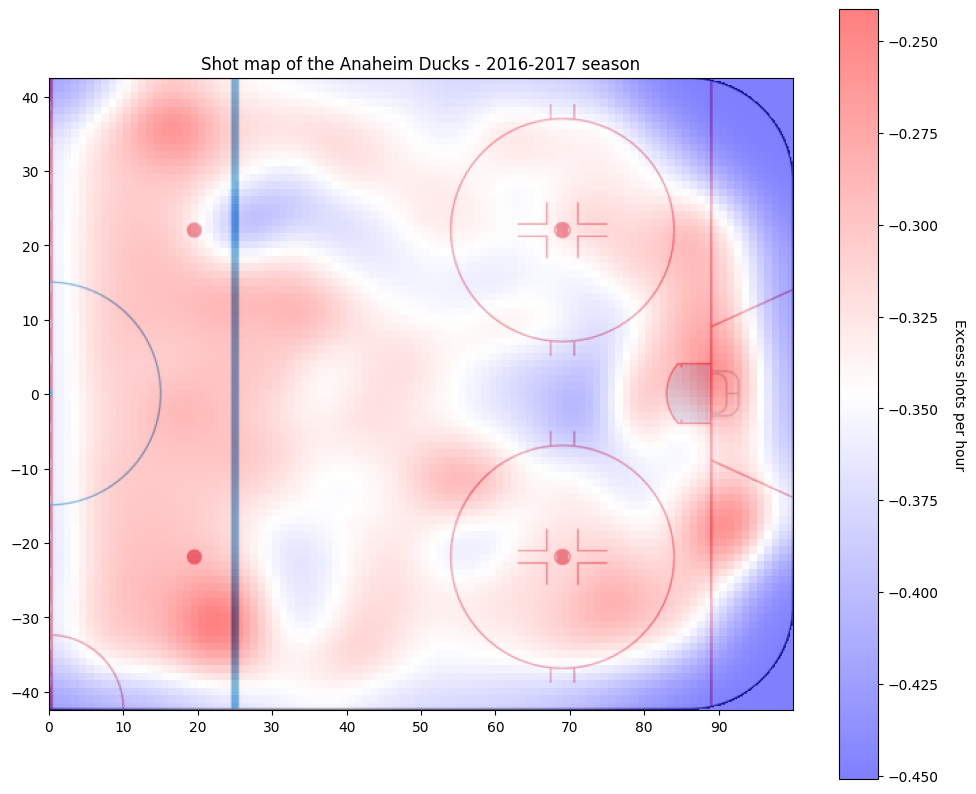

In [27]:

# Function to update the game based on the selected season and team
def update_game(year, team):
    print(f"Loading season {year} for the {team}...")
    # Simulate shot map data for the game
    plot_shot_map(year, team, dict_season_team)

year = widgets.Dropdown(
    options = ['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021'],
    value = '2016-2017',
    description = 'Select a season',
    disabled = False,
)
team = widgets.Dropdown(
    options=['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins', 'Buffalo Sabres',
             'Calgary Flames', 'Carolina Hurricanes', 'Chicago Blackhawks', 'Colorado Avalanche',
             'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings', 'Edmonton Oilers',
             'Florida Panthers', 'Los Angeles Kings', 'Minnesota Wild', 'Montréal Canadiens',
             'Nashville Predators', 'New Jersey Devils', 'New York Islanders', 'New York Rangers',
             'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'San Jose Sharks',
             'St. Louis Blues', 'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Vancouver Canucks',
             'Vegas Golden Knights', 'Washington Capitals', 'Winnipeg Jets'],
    value='Anaheim Ducks',
    description='Select a team',
    disabled=False,
)

load_button = widgets.Button(
    description='Load new shot map',
    button_style='success',
    tooltip='Load the selected game',
)

def load_game(button):
    year_id = year.value
    team_id = team.value
    update_game(year_id, team_id)

nb_loads = 0
load_button.on_click(load_game)

display(year, team, load_button)
